Read in 3d magnetic field datacube, and plot field line helicity of original field $\bf B$ and reference field $\bf B_p$ in DeVore-Coulomb gauge (integrating upward). 

Also plot the relative field-line helicity (i.e. their difference) for this gauge.

In [ ]:
import numpy as np
from flhcart import BField
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D
import time

Create 3d magnetic field object

- creating this object automatically computes A in the DeVore-Coulomb gauge

In [ ]:
b = BField('bhesse.nc')

Computing A...


Compute potential reference field and its vector potential

In [ ]:
b.computePotentialField()
b.computeADeVore(potential=True)

Computing potential field...
Computing Ap...


Change the gauge of $\bf A$ so that $\bf \hat{n} \times \bf A = \bf \hat{n} \times \bf A_p$ on the boundary

In [ ]:
b.matchPotentialGauge()

Matching Axn to Apxn on boundary...


array([[[-3.60126600e-12, -3.86278816e-12, -3.87323695e-12, ...,
         -3.84138773e-12, -3.84619948e-12, -3.44151729e-11],
        [-3.55796503e-12, -4.77103917e-11, -4.77102693e-11, ...,
         -4.76964727e-11, -4.76964970e-11, -3.43331944e-11],
        [-3.45221228e-12, -4.76922314e-11, -4.76920958e-11, ...,
         -4.76784491e-11, -4.76784754e-11, -3.38266078e-11],
        ...,
        [-3.23017315e-12, -4.64369824e-11, -4.64370485e-11, ...,
         -4.64357753e-11, -4.64357545e-11, -4.42287017e-11],
        [-3.26640451e-12, -4.63903160e-11, -4.63903199e-11, ...,
         -4.63906798e-11, -4.63906602e-11, -4.35873642e-11],
        [-3.21527077e-12, -1.55541175e-11, -1.55634899e-11, ...,
         -1.56238513e-11, -1.56289935e-11, -4.34034595e-11]],

       [[-3.28015373e-12, -3.54945271e-12, -3.54975224e-12, ...,
         -3.26570778e-12, -3.27036932e-12, -3.38634628e-11],
        [-3.23893846e-12,  3.90479484e-04,  7.85821213e-04, ...,
          1.55259178e+00,  1.79461624e

Choose grid of field lines at height $z = z_0$

In [ ]:
z0 = 0
nx = 128
ny = 128
x1 = np.linspace(b.x1[0], b.x1[-1], nx)
y1 = np.linspace(b.y1[0], b.y1[-1], ny)
x1s, y1s = np.meshgrid(x1,y1)
z1s = x1s*0 + z0
x0 = np.stack((x1s.flatten(), y1s.flatten(), z1s.flatten()), axis=1)

In [ ]:
x0

array([[-20.        , -20.        ,   0.        ],
       [-19.68503937, -20.        ,   0.        ],
       [-19.37007874, -20.        ,   0.        ],
       ...,
       [ 19.37007874,  20.        ,   0.        ],
       [ 19.68503937,  20.        ,   0.        ],
       [ 20.        ,  20.        ,   0.        ]])

Trace field lines and compute field-line helicity of $\bf B$ and $\bf B_p$

In [ ]:
flh = b.flHelicity(x0)
flh.shape

Tracing 16384 field lines...


(16384,)

In [ ]:
flh = flh.reshape(nx, ny)
flh.shape

(128, 128)

In [ ]:
flhp = b.flHelicity(x0, potential=True)
flhp.shape

Tracing 16384 field lines...


(16384,)

In [ ]:
flhp = flhp.reshape(nx, ny)
flhp.shape

(128, 128)

In [ ]:
rflh = flh - flhp
rflh.shape

(128, 128)

Plots

In [ ]:
fig = plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

FLH of $\bf B$

In [ ]:
ax = fig.add_subplot(131)
ax.set_xlim(b.x1[0], b.x1[-1])
ax.set_ylim(b.y1[0], b.y1[-1])
ax.set_aspect('equal')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('FLH of B, z = %g' % z0)
pm = ax.pcolormesh(x1, y1, flh, cmap='bwr')
cmax = np.max(np.abs(flh))
pm.set_clim(vmin=-cmax, vmax=cmax)
plt.colorbar(pm)

<matplotlib.colorbar.Colorbar>

<Figure size 640x480 with 0 Axes>

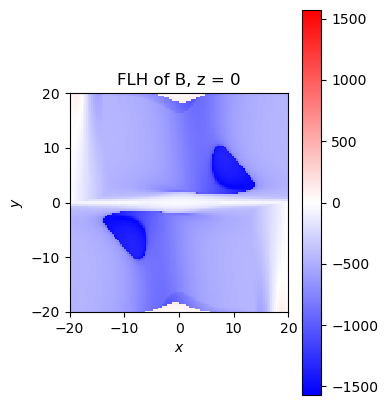

In [ ]:
fig

FLH of $\bf B_p$

In [ ]:
ax = fig.add_subplot(132)
ax.set_xlim(b.x1[0], b.x1[-1])
ax.set_ylim(b.y1[0], b.y1[-1])
ax.set_aspect('equal')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('FLH of Bp, z = %g' % z0)
pm = ax.pcolormesh(x1, y1, flhp, cmap='bwr')
cmax = np.max(np.abs(flh))
pm.set_clim(vmin=-cmax, vmax=cmax)
plt.colorbar(pm)

<matplotlib.colorbar.Colorbar>

<Figure size 640x480 with 0 Axes>

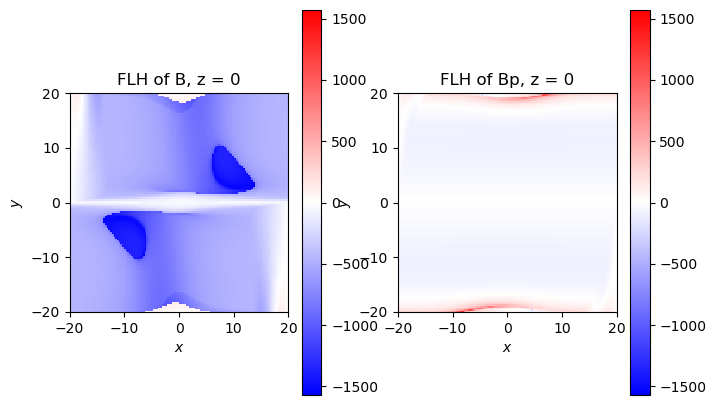

In [ ]:
fig

Relative FLH

In [ ]:
ax = fig.add_subplot(133)
ax.set_xlim(b.x1[0], b.x1[-1])
ax.set_ylim(b.y1[0], b.y1[-1])
ax.set_aspect('equal')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('relative FLH, z = %g' % z0)
pm = ax.pcolormesh(x1, y1, rflh, cmap='bwr')
cmax = np.max(np.abs(rflh))
pm.set_clim(vmin=-cmax, vmax=cmax)
plt.colorbar(pm)

<matplotlib.colorbar.Colorbar>

<Figure size 640x480 with 0 Axes>

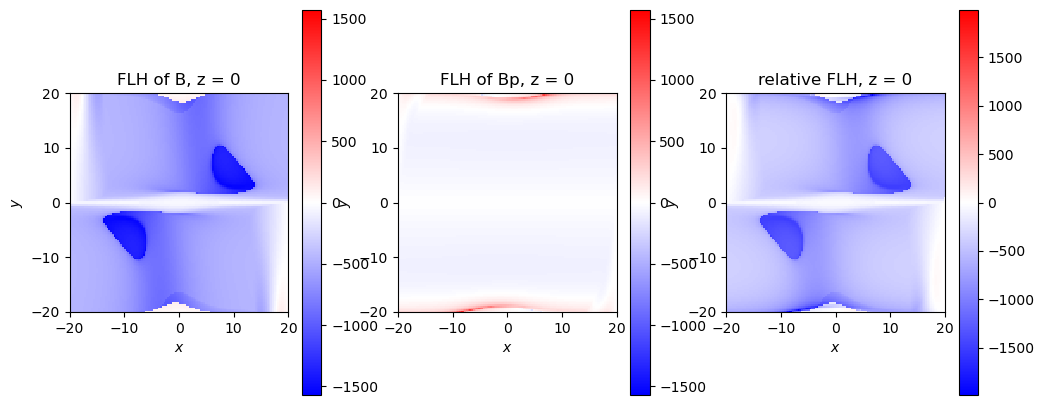

In [ ]:
fig

In [ ]:
fig.savefig('flhdevore.png', bbox_inches='tight')